### Introdução

Neste arquivo, realizaremos a limpeza e tratamento dos dados, corrigindo as inconsistências e problemas identificados durante a análise exploratória inicial no arquivo **`eda_book_recommendation.ipynb`**.

Após a limpeza, replicaremos as análises realizadas na seção `Perguntas que direcionarão a análise` para avaliar como a qualidade dos dados impacta os resultados e identificar possíveis diferenças após o tratamento.

### Import das Bibliotecas 

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import html

### Carregamento dos Dados

In [278]:
df_books_v2 = pd.read_csv('./data/Books.csv')
df_ratings_v2 = pd.read_csv('./data/Ratings.csv')
df_users_v2 = pd.read_csv('./data/Users.csv')

/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/1157164646.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books_v2 = pd.read_csv('./data/Books.csv')


### Limpeza e Tratamento nos Dados

#### **`df_books`**

---

##### **O que será tratado nesta tabela:**

1. **Valores Ausentes**:
   - Identificamos valores ausentes nas colunas:
     - `Book-Author`: 2 valores.
     - `Publisher`: 2 valores.
     - `Image-URL-L`: 3 valores.
   - Essas informações faltantes serão preenchidas de forma apropriada.

2. **Conversão da Coluna `Year-Of-Publication` para o Tipo Data**:
   - Como o dataset contém apenas o ano de publicação, adicionaremos uma data completa para criar um formato válido.
   - Utilizaremos o padrão **1º de janeiro** do ano correspondente para compor a data.

3. **Ajuste de Anos Inválidos**:
   - Verificamos a presença de anos superiores a 2025 (ano atual), totalizando **12 registros** Esses registros serão ajustados manualmente, garantindo a consistência dos dados.

##### **Valores Ausentes**

In [223]:
df_books_v2.set_index('ISBN', inplace=True)

In [224]:
df_books_v2[df_books_v2.isnull().any(axis=1)]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,
0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [225]:
df_books_v2.loc['0751352497', 'Book-Author'] = 'Unknown'
df_books_v2.loc['1931696993', 'Publisher'] = 'NovelBooks Inc'
df_books_v2.loc['193169656X', 'Publisher'] = 'Novelbooks Inc'
df_books_v2.loc['9627982032', 'Book-Author'] = 'Larissa Anne Downes'

In [226]:
df_books_v2[df_books_v2.isnull().any(axis=1)]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,
078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Neste caso, observamos que os valores das colunas Book-Author, Year-Of-Publication, Publisher e Image-URL-L estão trocados entre si. Vamos verificar se há outros registros com o mesmo problema para garantir a consistência dos dados.

In [227]:
# Tentar converter a coluna 'Year-Of-Publication' para números
df_books_v2['Year-Of-Publication'] = pd.to_numeric(df_books_v2['Year-Of-Publication'], errors='coerce')

# Verificar linhas onde a conversão falhou (valores NaN)
linhas_com_texto = df_books_v2[df_books_v2['Year-Of-Publication'].isna()]

print("Linhas com texto inválido na coluna 'Year-Of-Publication':")
print(linhas_com_texto)

Linhas com texto inválido na coluna 'Year-Of-Publication':
                                                   Book-Title Book-Author  \
ISBN                                                                        
078946697X  DK Readers: Creating the X-Men, How It All Beg...        2000   
2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...        2003   
0789466953  DK Readers: Creating the X-Men, How Comic Book...        2000   

            Year-Of-Publication  \
ISBN                              
078946697X                  NaN   
2070426769                  NaN   
0789466953                  NaN   

                                                    Publisher  \
ISBN                                                            
078946697X  http://images.amazon.com/images/P/078946697X.0...   
2070426769  http://images.amazon.com/images/P/2070426769.0...   
0789466953  http://images.amazon.com/images/P/0789466953.0...   

                                                  Ima

Ou seja, é apenas as três linhas que estão incorretas mesmo, então iremos ajusta-las:

In [228]:
df_books_v2.loc['078946697X', 'Publisher'] = 'DK Publishing Inc'
df_books_v2.loc['2070426769', 'Publisher'] = 'Gallimard'
df_books_v2.loc['0789466953', 'Publisher'] = 'DK Publishing Inc'

df_books_v2.loc['078946697X', 'Image-URL-L'] = 'https://images.amazon.com/images/P/078946697X.0'
df_books_v2.loc['2070426769', 'Image-URL-L'] = 'https://images.amazon.com/images/P/2070426769.0'
df_books_v2.loc['0789466953', 'Image-URL-L'] = 'https://images.amazon.com/images/P/0789466953.0'

df_books_v2.loc['078946697X', 'Year-Of-Publication'] = '2000'
df_books_v2.loc['2070426769', 'Year-Of-Publication'] = '2003'
df_books_v2.loc['0789466953', 'Year-Of-Publication'] = '2000'

df_books_v2.loc['078946697X', 'Book-Author'] = "Cynthia O'Neill"
df_books_v2.loc['2070426769', 'Book-Author'] = 'Jean-Marie Gustave Le Clézio'
df_books_v2.loc['0789466953', 'Book-Author'] = "Cynthia O'Neill"

/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/18516903.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_books_v2.loc['078946697X', 'Year-Of-Publication'] = '2000'


In [229]:
df_books_v2[df_books_v2.isnull().any(axis=1)]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,


##### **Conversão da Coluna `Year-Of-Publication` para o Tipo Data e Ajustes nos Anos Inválidos**

In [230]:
df_books_v2['Year-Of-Publication'] = pd.to_numeric(df_books_v2['Year-Of-Publication'], errors='coerce')

df_books_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271360 entries, 0195153448 to 0767409752
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Book-Title           271360 non-null  object 
 1   Book-Author          271360 non-null  object 
 2   Year-Of-Publication  271360 non-null  float64
 3   Publisher            271360 non-null  object 
 4   Image-URL-S          271360 non-null  object 
 5   Image-URL-M          271360 non-null  object 
 6   Image-URL-L          271360 non-null  object 
dtypes: float64(1), object(6)
memory usage: 24.6+ MB


In [231]:
df_books_v2['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,    0., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 2030., 1911., 1904., 1949., 1932.,
       1928., 1929., 1927., 1931., 1914., 2050., 1934., 1910., 1933.,
       1902., 1924., 1921., 1900., 2038., 2026., 1944., 1917., 1901.,
       2010., 1908., 1906., 1935., 1806., 2021., 2012., 2006., 1909.,
       2008., 1378., 1919., 1922., 1897., 2024., 1376., 2037.])

In [232]:
print(f"Quantidade de registros com anos iguais a zero: {df_books_v2[df_books_v2['Year-Of-Publication'] == 0].shape[0]}")
print(f"Quantidade de registros com anos menores que zero: {df_books_v2[df_books_v2['Year-Of-Publication'] < 0].shape[0]}")
print(f"Quantidade de registros com anos maiores que 2025: {df_books_v2[df_books_v2['Year-Of-Publication'] > 2025].shape[0]}")
print(df_books_v2[df_books_v2['Year-Of-Publication'] > 2025])


Quantidade de registros com anos iguais a zero: 4618
Quantidade de registros com anos menores que zero: 0
Quantidade de registros com anos maiores que 2025: 12
                                                   Book-Title  \
ISBN                                                            
0671746103  MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...   
0671791990  MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...   
0870449842                                   Crossing America   
0140301690  Alice's Adventures in Wonderland and Through t...   
0140201092      Outline of European Architecture (Pelican S.)   
0394701658                       Three Plays of Eugene Oneill   
3442436893        Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.   
0870446924  Field Guide to the Birds of North America, 3rd...   
0671266500       FOREST PEOPLE (Touchstone Books (Hardcover))   
0684718022            In Our Time: Stories (Scribner Classic)   
068471809X                               To Have and Have No

In [233]:
df_books_v2.loc['0671746103', 'Year-Of-Publication'] = 1991
df_books_v2.loc['0671791990', 'Year-Of-Publication'] = 2003
df_books_v2.loc['0870449842', 'Year-Of-Publication'] = 1999
df_books_v2.loc['0140301690', 'Year-Of-Publication'] = 1950
df_books_v2.loc['0140201092', 'Year-Of-Publication'] = 1950
df_books_v2.loc['0394701658', 'Year-Of-Publication'] = 1959
df_books_v2.loc['3442436893', 'Year-Of-Publication'] = 1996
df_books_v2.loc['0870446924', 'Year-Of-Publication'] = 1999
df_books_v2.loc['0671266500', 'Year-Of-Publication'] = 1961
df_books_v2.loc['0684718022', 'Year-Of-Publication'] = 1970
df_books_v2.loc['068471809X', 'Year-Of-Publication'] = 1937
df_books_v2.loc['0671740989', 'Year-Of-Publication'] = 1991

In [234]:
df_books_v2[df_books_v2['Year-Of-Publication'] > 2025]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,


In [235]:
df_books_v2['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,    0., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924.,
       1921., 1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935.,
       1806., 2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922.,
       1897., 2024., 1376.])

In [236]:
# Antes de converter para o tipo data, converter para tipo int
df_books_v2['Year-Of-Publication'] = df_books_v2['Year-Of-Publication'].astype('Int64')

df_books_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271360 entries, 0195153448 to 0767409752
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Book-Title           271360 non-null  object
 1   Book-Author          271360 non-null  object
 2   Year-Of-Publication  271360 non-null  Int64 
 3   Publisher            271360 non-null  object
 4   Image-URL-S          271360 non-null  object
 5   Image-URL-M          271360 non-null  object
 6   Image-URL-L          271360 non-null  object
dtypes: Int64(1), object(6)
memory usage: 24.9+ MB


In [237]:
df_books_v2['Year-Of-Publication'] = pd.to_datetime(
    df_books_v2['Year-Of-Publication'].astype(str) + '-01-01',
    format='%Y-%m-%d',  
    errors='coerce'  
)

In [238]:
df_books_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271360 entries, 0195153448 to 0767409752
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Book-Title           271360 non-null  object        
 1   Book-Author          271360 non-null  object        
 2   Year-Of-Publication  266740 non-null  datetime64[ns]
 3   Publisher            271360 non-null  object        
 4   Image-URL-S          271360 non-null  object        
 5   Image-URL-M          271360 non-null  object        
 6   Image-URL-L          271360 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 24.6+ MB


In [239]:
print(f"Quantidade de linhas com NaT no ano: {df_books_v2[df_books_v2.isnull().any(axis=1)].shape[0]}")

Quantidade de linhas com NaT no ano: 4620


#### **`df_users`**

---

##### **O que será tratado nesta tabela:**

Observamos que, em alguns registros, a idade apresenta valores incoerentes, com idades superiores a 110 ou até 200 anos. Além disso, há registros de usuários sem idade informada (resultando em valores NaN) e outros que informaram idade igual a zero.

Para tratar esses dados, inicialmente verificamos se esses usuários possuem registros associados na tabela de avaliações (ratings). Quando não há associação, esses usuários são removidos para evitar distorções nos dados.

Além disso, excluímos também os usuários com idade válida, mas que não possuem nenhuma avaliação associada à tabela de ratings. Essa abordagem assegura que estamos considerando apenas usuários ativos e com dados completos. Excluir usuários sem avaliações ou com informações inválidas ajuda a:

- Evitar distorções nos resultados: Usuários que não têm interações relevantes (como avaliações) não devem impactar a criação do modelo.
- Melhorar a qualidade das recomendações: Ao garantir que estamos utilizando dados válidos, o sistema pode identificar melhor os padrões de comportamento dos usuários.
- Otimizar a performance: Trabalhar com um conjunto de dados menor e mais relevante torna o modelo de recomendação mais eficiente.


In [279]:
print(f"Quantidade de registros na tabela users: {df_users_v2.shape[0]}")
print(f"Quantidade de registros com valores nulos em cada coluna: \n{df_users_v2.isna().sum()}")

Quantidade de registros na tabela users: 278858
Quantidade de registros com valores nulos em cada coluna: 
User-ID          0
Location         0
Age         110762
dtype: int64


Num total de 278858 registros, temos que há 110762 registros sem a idade informada, agora vamos verificar quais valores essa coluna possui.

In [280]:
df_users_v2['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [281]:
usuarios_incoerentes = df_users_v2[(df_users_v2['Age'].isna()) | 
                                   (df_users_v2['Age'] == 0) | 
                                   (df_users_v2['Age'] > 110)]

usuarios_com_reviews = set(df_ratings_v2['User-ID'])

usuarios_incoerentes_sem_reviews = set(usuarios_incoerentes['User-ID']) - usuarios_com_reviews

df_users_filtrado = df_users_v2[~df_users_v2['User-ID'].isin(usuarios_incoerentes_sem_reviews)]

usuarios_restantes_sem_reviews = set(df_users_filtrado['User-ID']) - usuarios_com_reviews

df_users_v3 = df_users_filtrado[~df_users_filtrado['User-ID'].isin(usuarios_restantes_sem_reviews)]

print(f"Total de usuários antes da filtragem: {df_users_v2.shape[0]}")
print(f"Total de usuários após a filtragem: {df_users_v3.shape[0]}")
print(f"Usuários incoerentes sem reviews removidos: {len(usuarios_incoerentes_sem_reviews)}")
print(f"Usuários válidos sem reviews removidos: {len(usuarios_restantes_sem_reviews)}")
print(f"Total de usuários removidos: {df_users_v2.shape[0] - df_users_v3.shape[0]}")


Total de usuários antes da filtragem: 278858
Total de usuários após a filtragem: 105283
Usuários incoerentes sem reviews removidos: 67900
Usuários válidos sem reviews removidos: 105675
Total de usuários removidos: 173575


In [282]:
df_users_v3['Age'].unique()

array([ 18.,  nan,  26.,  14.,  19.,  24.,  34.,  17.,  51.,  32.,  43.,
        44.,  37.,  20.,  41.,  42.,  57.,  49.,  47.,  38.,  45.,  35.,
        62.,  28.,  36.,  27.,  33.,  23.,  15.,  21.,  79.,  16.,  29.,
        25.,  53.,  59.,  63.,  22.,  40.,  48.,  72.,  31.,  58.,  50.,
        69.,  55.,  13.,  30.,  65.,   1.,  56.,  52.,  46.,   9.,  39.,
        71.,  74.,  54.,  61.,   0.,  75.,  60.,   3.,  64.,  66.,  83.,
       103.,  11.,  68.,   2.,  12.,  77.,  73.,  70., 104.,   8.,  76.,
       239.,  78.,  67.,  93., 151., 201.,  10.,  80., 244.,  82.,   7.,
       123., 128., 101.,  81., 141., 219.,  84.,   4.,  96., 172., 124.,
       133., 209., 212.,   5., 237., 156., 136.,  95.,  89.,   6.,  99.,
       100.,  86., 108., 199.,  92.,  85., 147.,  90.,  97., 168., 148.,
       132., 152., 114., 116., 226., 229., 138., 109., 105., 228., 223.,
       107., 157.,  91., 115., 146., 204., 118.,  94., 220., 200., 140.,
       127.,  98.])

Observe que ainda existem alguns registros com idades superiores a 110, 200 ou iguais a zero. Nesse caso, vamos substituir esses valores por null, uma vez que se trata de usuários que já possuem avaliações registradas na tabela de ratings. Essa abordagem mantém os usuários ativos, mas corrige as inconsistências nos dados de idade.

In [283]:
print(f"Quantidade de registros com idades acima que 110: {df_users_v3[df_users_v3['Age'] > 110].shape[0]}")
print(f"Quantidade de registros com idades iguais a zero: {df_users_v3[df_users_v3['Age'] == 0].shape[0]}")
print(f"Total de linhas que serão alteradas: {df_users_v3[df_users_v3['Age'] > 110].shape[0] + df_users_v3[df_users_v3['Age'] == 0].shape[0]}")

Quantidade de registros com idades acima que 110: 50
Quantidade de registros com idades iguais a zero: 148
Total de linhas que serão alteradas: 198


In [284]:
df_users_v3.loc[(df_users_v3['Age'] > 110) | (df_users_v3['Age'] == 0), 'Age'] = np.nan

In [285]:
df_users_v3['Age'].unique()

array([ 18.,  nan,  26.,  14.,  19.,  24.,  34.,  17.,  51.,  32.,  43.,
        44.,  37.,  20.,  41.,  42.,  57.,  49.,  47.,  38.,  45.,  35.,
        62.,  28.,  36.,  27.,  33.,  23.,  15.,  21.,  79.,  16.,  29.,
        25.,  53.,  59.,  63.,  22.,  40.,  48.,  72.,  31.,  58.,  50.,
        69.,  55.,  13.,  30.,  65.,   1.,  56.,  52.,  46.,   9.,  39.,
        71.,  74.,  54.,  61.,  75.,  60.,   3.,  64.,  66.,  83., 103.,
        11.,  68.,   2.,  12.,  77.,  73.,  70., 104.,   8.,  76.,  78.,
        67.,  93.,  10.,  80.,  82.,   7., 101.,  81.,  84.,   4.,  96.,
         5.,  95.,  89.,   6.,  99., 100.,  86., 108.,  92.,  85.,  90.,
        97., 109., 105., 107.,  91.,  94.,  98.])

Por último, iremos converter o tipo de dados da coluna `age` para int:

In [286]:
df_users_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105283 entries, 1 to 278853
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   105283 non-null  int64  
 1   Location  105283 non-null  object 
 2   Age       61909 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [287]:
df_users_v3['Age'] = df_users_v3['Age'].astype('Int64')

/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/2567191244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_v3['Age'] = df_users_v3['Age'].astype('Int64')


In [288]:
df_users_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105283 entries, 1 to 278853
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   105283 non-null  int64 
 1   Location  105283 non-null  object
 2   Age       61909 non-null   Int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [289]:
df_users_v2 = df_users_v3

df_users_v2.shape[0]

105283

E por último, verificamos que algumas localizações retornaram como `&#20013;&#23665;&#24066;`, que podem ser resultados de caracteres codificados em HTML ou problemas de codificação de caracteres.

In [290]:
localizacoes_codificadas = df_users_v2[df_users_v2['Location'].str.contains('&#', na=False)]
print(localizacoes_codificadas)

        User-ID                                           Location   Age
9310       9311                    &#321;ód&#378;, lodzkie, poland    17
10661     10662                  nanchong, &#22235;&#24029;, china  <NA>
26569     26570       b&#322;a&#380;owa, woj. podkarpackie, poland    15
33775     33776               £ód&#378;, woj. &#322;ódzkie, poland    32
34899     34900                        &#321;ód&#378;, n/a, poland    67
35955     35956                         bodrum, mu&#287;la, turkey    59
55899     55900               &#321;ód&#378;, &#322;ódzkie, poland    29
71866     71867                            ayd&#305;n, n/a, turkey    19
100374   100375                kocaeli, &#304;nanç  lisesi, turkey    15
104295   104296          sosnowiec, woj. &#346;l&#261;skie, poland    29
124783   124784                     &#24034;&#28246;, anhui, china  <NA>
159302   159303                  bia&#322;ystok, podlaskie, poland    38
180842   180843                     &#269;akovec, c

In [291]:
# Decodificar as localizações codificadas
df_users_v2['Location'] = df_users_v2['Location'].apply(lambda x: html.unescape(x) if isinstance(x, str) and '&#' in x else x)

# Padronizar as localizações, transformando para minúsculas e removendo espaços extras
df_users_v2['Location'] = df_users_v2['Location'].str.lower().str.strip()

/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/485391370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_v2['Location'] = df_users_v2['Location'].apply(lambda x: html.unescape(x) if isinstance(x, str) and '&#' in x else x)
/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/485391370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_v2['Location'] = df_users_v2['Location'].str.lower().str.strip()


In [292]:
print(df_users_v2[df_users_v2['User-ID'] == 189961])

        User-ID       Location  Age
189960   189961  贵港, 广西, china   18


#### **`df_ratings`**

Nessa tabela não identificamos pontos necessários para tratar, então não a alteramos.

## Perguntas que iremos direcionar a análise:

##### **Tabela `books`**

- Quais são os autores mais publicados na base de dados?
- Quais são as editoras que publicaram mais livros?
- Como os livros estão distribuídos ao longo dos anos de publicação?
- Há livros com títulos duplicados, mas com ISBNs diferentes? Se sim, o que isso pode significar?
- Quantos livros únicos existem na base de dados?

-----------------------------------------------------------------------------
Quais são os autores mais publicados na base de dados?
-----------------------------------------------------------------------------
Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


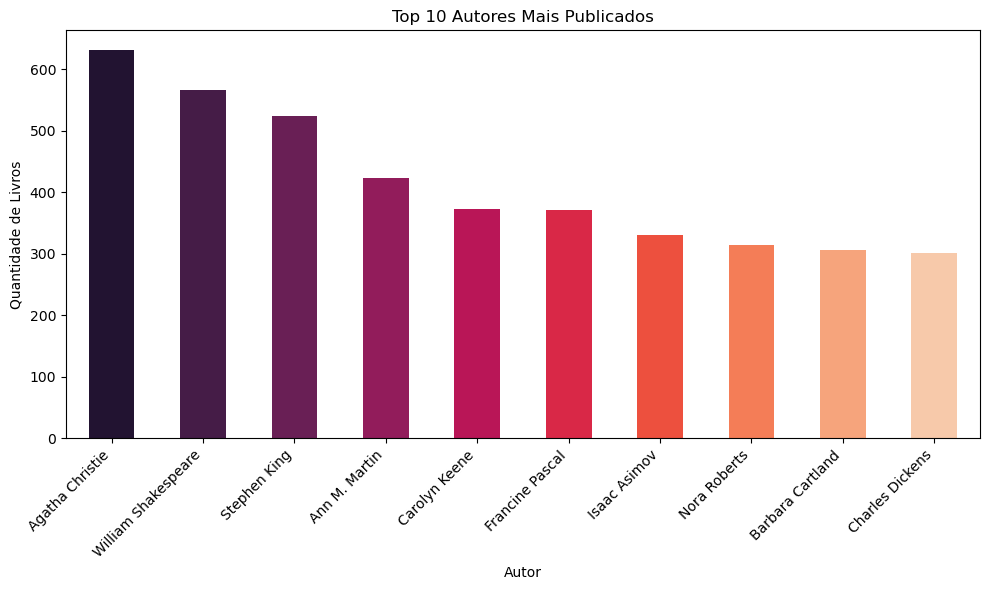

In [254]:
print('-----------------------------------------------------------------------------')
print('Quais são os autores mais publicados na base de dados?')
print('-----------------------------------------------------------------------------')

autores_contagem = df_books_v2['Book-Author'].value_counts()
top_autores = autores_contagem.head(10)
print(top_autores)

cores = sns.color_palette("rocket", n_colors=10)

plt.figure(figsize=(10, 6))
top_autores.plot(kind='bar', color=cores)
plt.title('Top 10 Autores Mais Publicados')
plt.xlabel('Autor')
plt.ylabel('Quantidade de Livros')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------
Quais são as editoras que publicaram mais livros?
-----------------------------------------------------------------------------
Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64


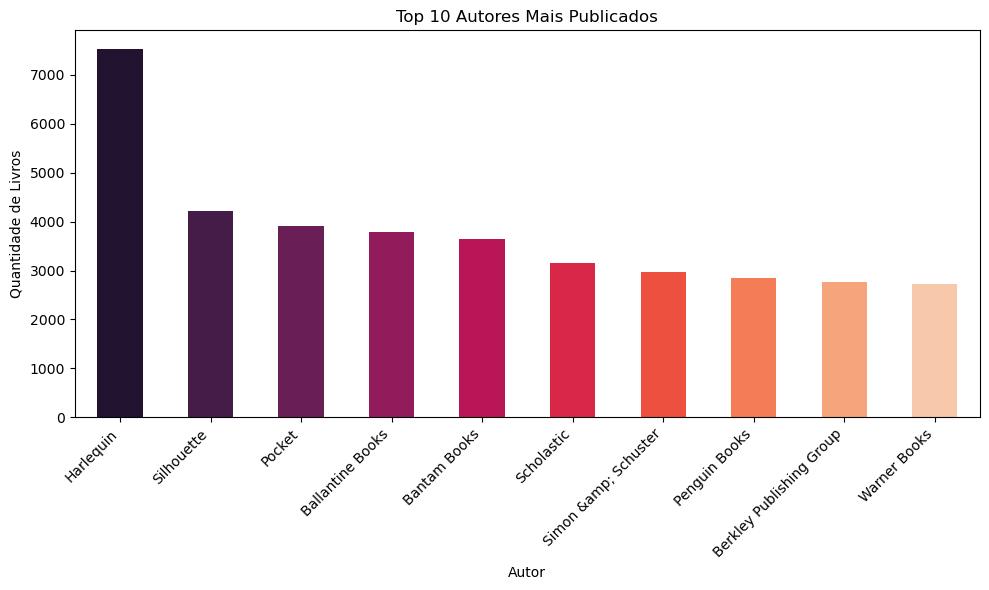


Editoras que menos publicaram na tabela:  
Publisher
Sands Pub Llc                    1
Shadow Line Press                1
ImaJinn Books                    1
Windstream Publishing Company    1
Polaris Books                    1
Hannover House                   1
Amber Quill Press, LLC.          1
Lunchbox Press                   1
Ugly Town                        1
Connaught                        1
Name: count, dtype: int64


In [255]:
print('-----------------------------------------------------------------------------')
print('Quais são as editoras que publicaram mais livros?')
print('-----------------------------------------------------------------------------')

editoras_contagem = df_books_v2['Publisher'].value_counts()
top_editoras = editoras_contagem.head(10)
print(top_editoras)

cores = sns.color_palette("rocket", n_colors=10)

plt.figure(figsize=(10, 6))
top_editoras.plot(kind='bar', color=cores)
plt.title('Top 10 Autores Mais Publicados')
plt.xlabel('Autor')
plt.ylabel('Quantidade de Livros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nEditoras que menos publicaram na tabela:  \n{editoras_contagem.tail(10)}")


-----------------------------------------------------------------------------
Como os livros estão distribuídos ao longo dos anos de publicação?
-----------------------------------------------------------------------------
Year-Of-Publication
1806-01-01        1
1897-01-01        1
1900-01-01        3
1901-01-01        7
1902-01-01        2
              ...  
2001-01-01    17359
2002-01-01    17627
2003-01-01    14360
2004-01-01     5839
2005-01-01       46
Name: count, Length: 100, dtype: int64


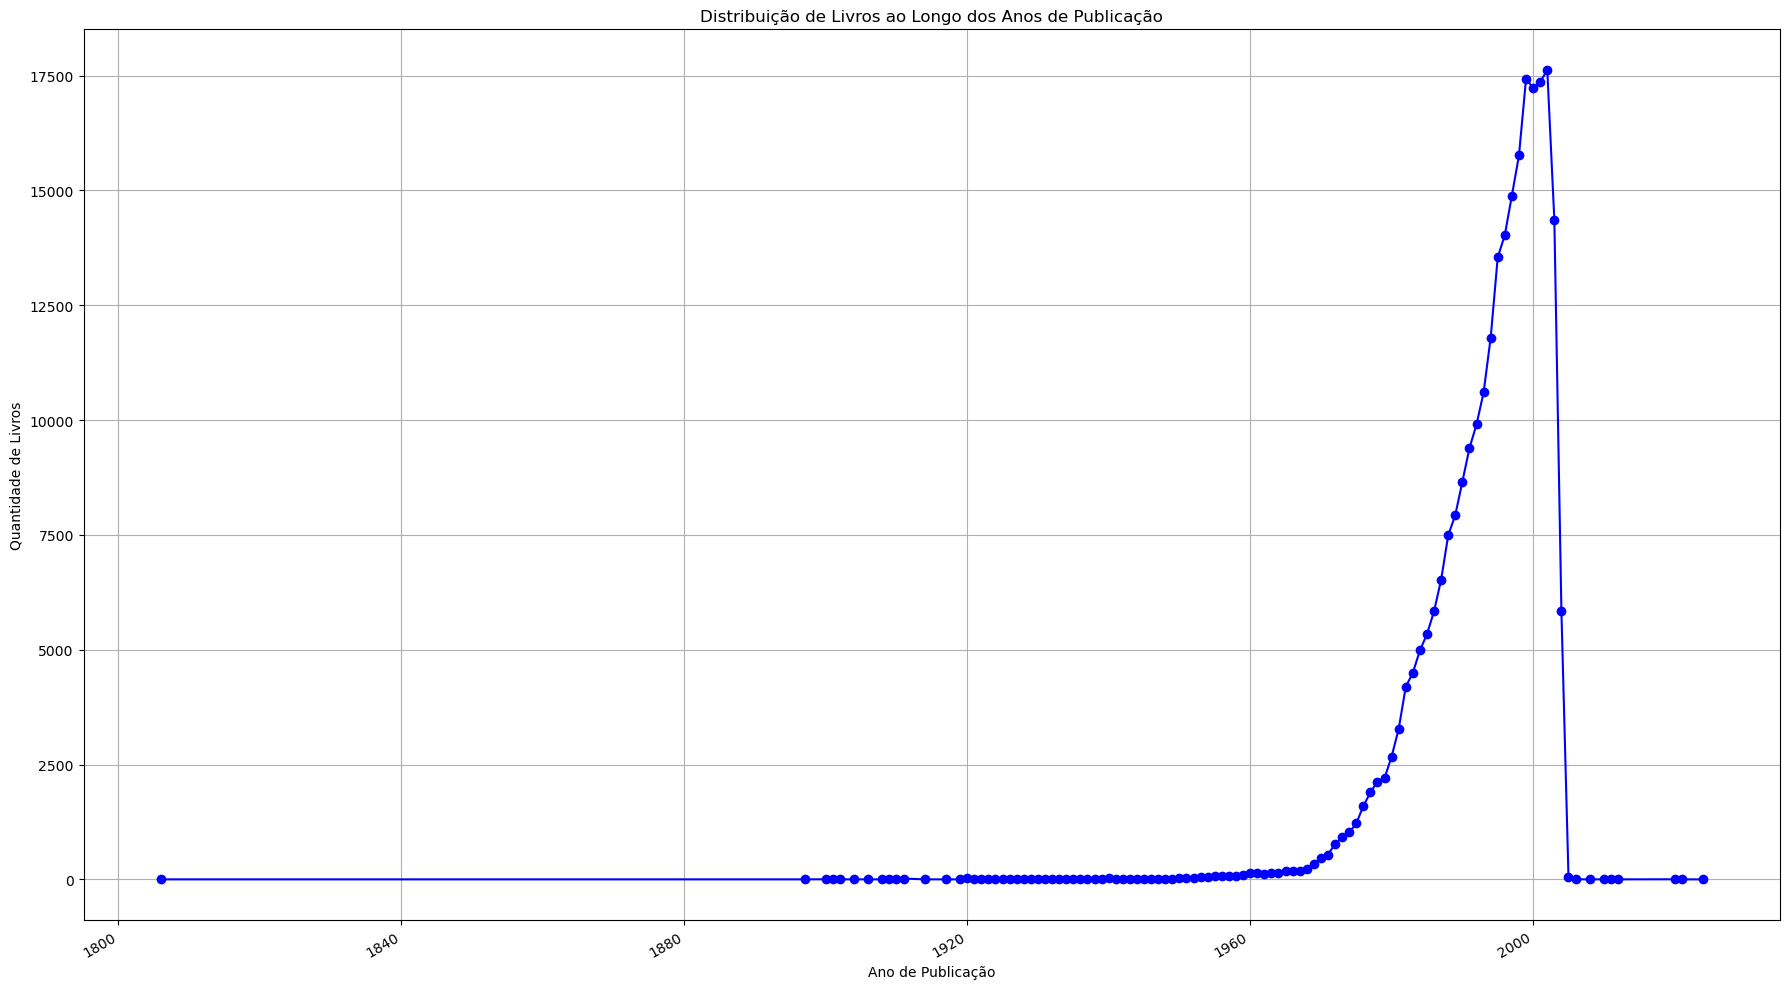

Anos que mais registraram livros:
Year-Of-Publication
2002-01-01    17627
1999-01-01    17433
2001-01-01    17359
2000-01-01    17234
1998-01-01    15766
1997-01-01    14890
2003-01-01    14360
1996-01-01    14031
1995-01-01    13546
1994-01-01    11796
1993-01-01    10602
1992-01-01     9906
1991-01-01     9391
1990-01-01     8660
1989-01-01     7936
Name: count, dtype: int64


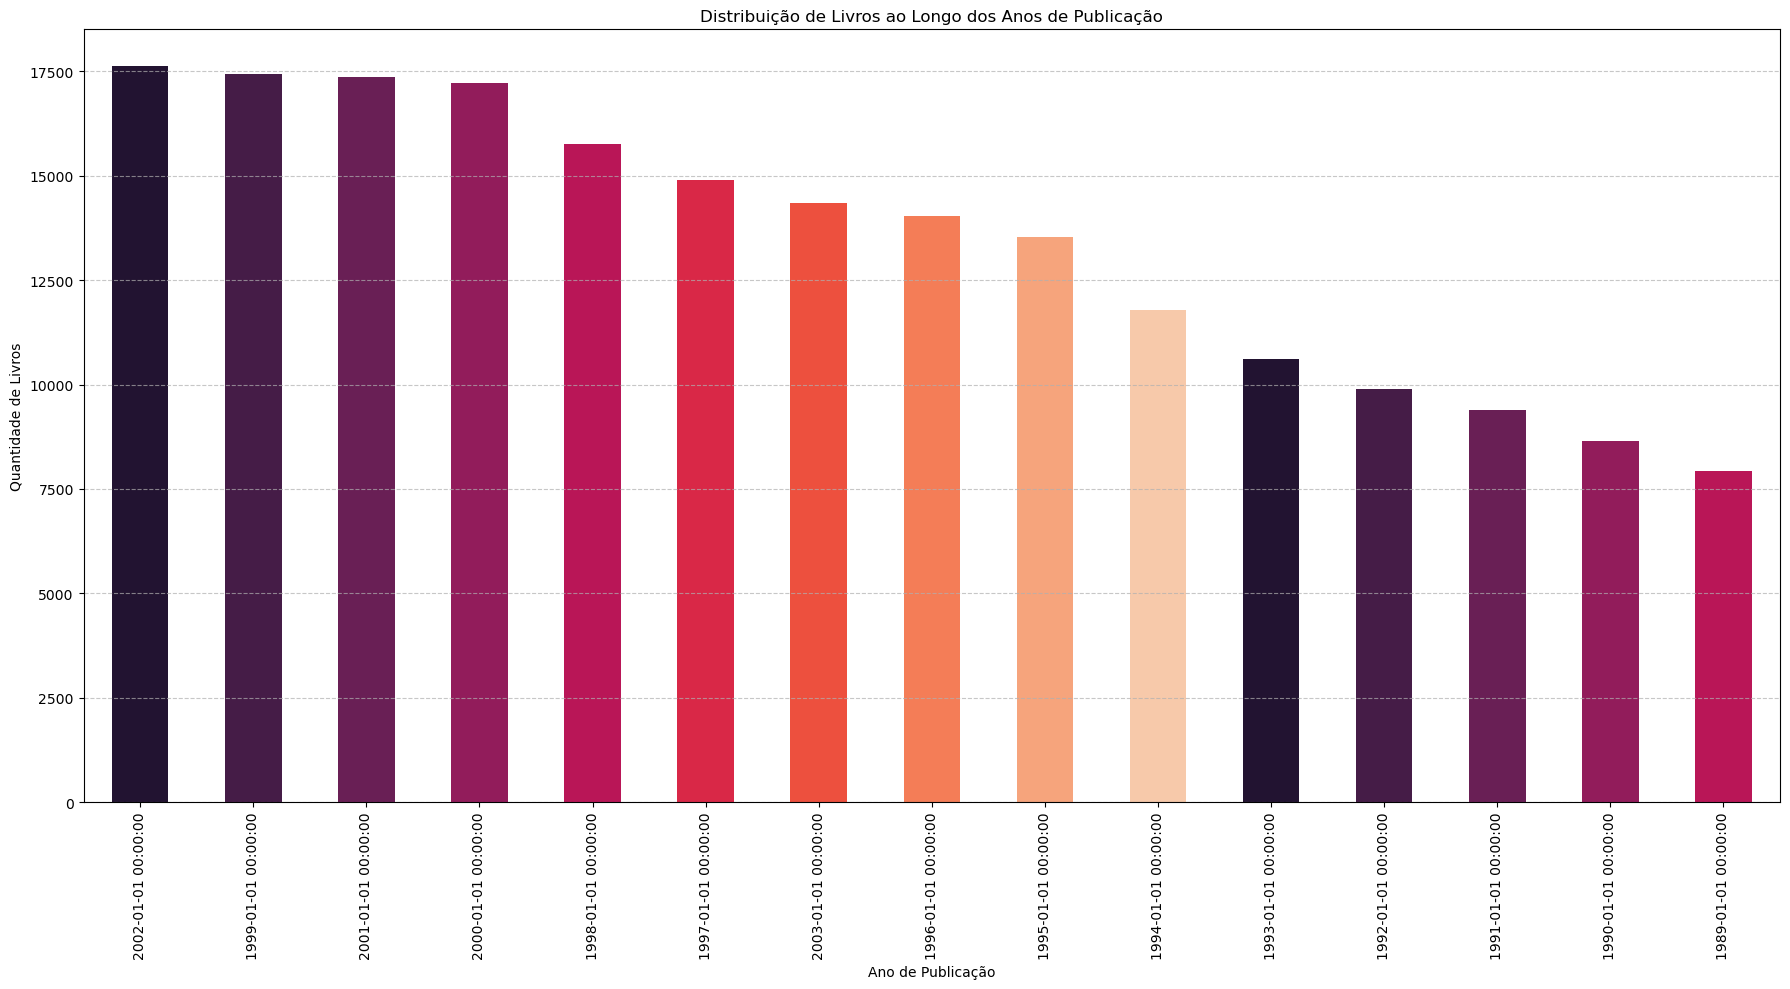

In [256]:
print('-----------------------------------------------------------------------------')
print('Como os livros estão distribuídos ao longo dos anos de publicação?')
print('-----------------------------------------------------------------------------')

livros_por_ano = df_books_v2['Year-Of-Publication'].value_counts().sort_index()

print(livros_por_ano.head(100))

plt.figure(figsize=(18, 10))
livros_por_ano.plot(kind='line', color='blue', marker='o')
plt.title('Distribuição de Livros ao Longo dos Anos de Publicação')
plt.xlabel('Ano de Publicação')
plt.ylabel('Quantidade de Livros')
plt.grid(True)
plt.tight_layout()
plt.show()

top_livros_por_ano = df_books_v2['Year-Of-Publication'].value_counts().sort_values(ascending=False)

print("Anos que mais registraram livros:")
print(top_livros_por_ano.head(15)) 

plt.figure(figsize=(18, 10))
top_livros_por_ano.head(15).plot(kind='bar', color=cores)
plt.title('Distribuição de Livros ao Longo dos Anos de Publicação')
plt.xlabel('Ano de Publicação')
plt.ylabel('Quantidade de Livros')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [257]:
print('-----------------------------------------------------------------------------')
print('Há livros com títulos duplicados, mas com ISBNs diferentes? Se sim, o que isso pode significar?')
print('-----------------------------------------------------------------------------')

duplicados = df_books_v2[df_books_v2.duplicated(subset=['Book-Title'], keep=False)]

duplicados_isbn_diferentes = duplicados.groupby('Book-Title').filter(lambda x: len(x.index.unique()) > 1)

print(duplicados_isbn_diferentes[['Book-Title']].shape[0])

print(duplicados_isbn_diferentes[['Book-Title']])

duplicados_isbn_diferentes


-----------------------------------------------------------------------------
Há livros com títulos duplicados, mas com ISBNs diferentes? Se sim, o que isso pode significar?
-----------------------------------------------------------------------------
49132
                                                   Book-Title
ISBN                                                         
0195153448                                Classical Mythology
0399135782                             The Kitchen God's Wife
0425176428  What If?: The World's Foremost Military Histor...
074322678X            Where You'll Find Me: And Other Stories
1552041778                                           Jane Doe
...                                                       ...
0195124995  For Cause and Comrades: Why Men Fought in the ...
1902852036                                All the Queen's Men
0441011799                                    Singularity Sky
0395264707                                         Dreamsnak

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,
0195153448,Classical Mythology,Mark P. O. Morford,2002-01-01,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
0399135782,The Kitchen God's Wife,Amy Tan,1991-01-01,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000-01-01,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002-01-01,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
1552041778,Jane Doe,R. J. Kaiser,1999-01-01,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...
...,...,...,...,...,...,...,...
0195124995,For Cause and Comrades: Why Men Fought in the ...,James M. McPherson,1998-01-01,Oxford University Press,http://images.amazon.com/images/P/0195124995.0...,http://images.amazon.com/images/P/0195124995.0...,http://images.amazon.com/images/P/0195124995.0...
1902852036,All the Queen's Men,Nick Elwood,1999-01-01,Gay Men's Press,http://images.amazon.com/images/P/1902852036.0...,http://images.amazon.com/images/P/1902852036.0...,http://images.amazon.com/images/P/1902852036.0...
0441011799,Singularity Sky,Charles Stross,2004-01-01,Ace,http://images.amazon.com/images/P/0441011799.0...,http://images.amazon.com/images/P/0441011799.0...,http://images.amazon.com/images/P/0441011799.0...


In [258]:
print('-----------------------------------------------------------------------------')
print('Quantos livros únicos existem na base de dados?')
print('-----------------------------------------------------------------------------')

livros_unicos = df_books_v2['Book-Title'].nunique()
print(f"Quantidade de livros únicos na base de dados: {livros_unicos}")

-----------------------------------------------------------------------------
Quantos livros únicos existem na base de dados?
-----------------------------------------------------------------------------
Quantidade de livros únicos na base de dados: 242135


##### **Tabela `users`**

- De quais localizações (cidades, estados, países) os usuários são majoritariamente originários? Há concentrações específicas de usuários em determinadas regiões?
- Qual é a distribuição etária dos usuários? Há faixas etárias predominantes entre os usuários?
- Existem faixas etárias predominantes em determinadas localizações?
- A idade média varia de acordo com a localização dos usuários?
- Há faixas etárias predominantes entre os usuários?
- Qual é a média, mediana e desvio padrão das idades?
- Qual é a idade mínima e máxima registrada?

-----------------------------------------------------------------------------
De quais localizações (cidades, estados, países) os usuários são majoritariamente originários? Há concentrações específicas de usuários em determinadas regiões?
-----------------------------------------------------------------------------
Location
toronto, ontario, canada               949
seattle, washington, usa               783
portland, oregon, usa                  759
london, england, united kingdom        754
vancouver, british columbia, canada    722
chicago, illinois, usa                 685
san francisco, california, usa         647
ottawa, ontario, canada                634
san diego, california, usa             584
new york, new york, usa                579
Name: count, dtype: int64


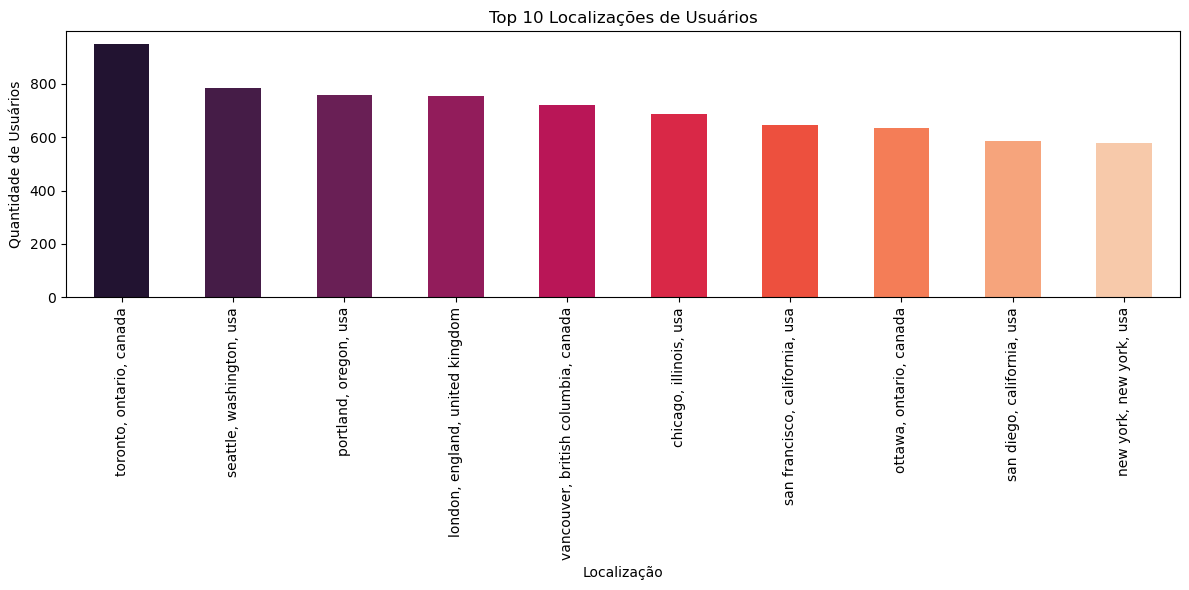

Localizações com menos usuários: Location
georgetown,, massachusetts, usa        1
bitz, baden-wuerttemberg, germany      1
ronchin, nord, france                  1
noida, uttar pradesh, india            1
alexandria, ohio, usa                  1
binche, hainaut, belgium               1
birkenhead, england, united kingdom    1
brinston, ontario, canada              1
va. beach, virginia, usa               1
ninety six, south carolina, usa        1
Name: count, dtype: int64


In [259]:
print('-----------------------------------------------------------------------------')
print('De quais localizações (cidades, estados, países) os usuários são majoritariamente originários? Há concentrações específicas de usuários em determinadas regiões?')
print('-----------------------------------------------------------------------------')

usuarios_por_localizacao = df_users_v2['Location'].value_counts()
print(usuarios_por_localizacao.head(10)) 

plt.figure(figsize=(12, 6))
usuarios_por_localizacao.head(10).plot(kind='bar', color=cores)
plt.title('Top 10 Localizações de Usuários')
plt.xlabel('Localização')
plt.ylabel('Quantidade de Usuários')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"Localizações com menos usuários: {usuarios_por_localizacao.tail(10)}")

-----------------------------------------------------------------------------
Qual é a distribuição etária dos usuários? Há faixas etárias predominantes entre os usuários?
Há usuários com idades inconsistentes ou fora de uma faixa razoável (por exemplo, menores de 5 anos ou maiores de 100)?
-----------------------------------------------------------------------------


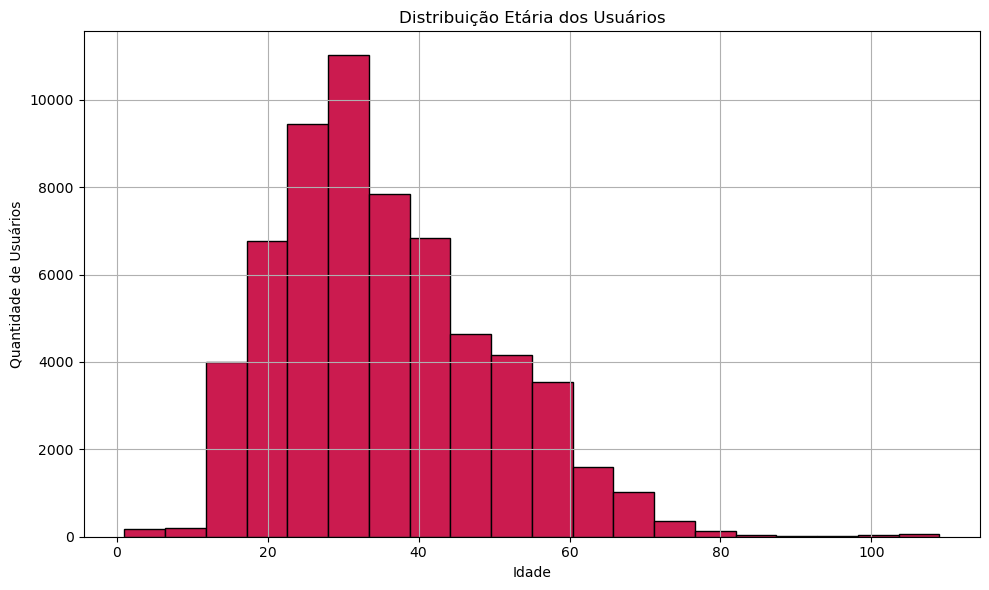

Faixa Etária
[0, 18)        4372
[18, 25)      10416
[25, 35)      18659
[35, 45)      12845
[45, 55)       8799
[55, 65)       4901
[65, 100)      1812
[100, 200)      105
[200, 300)        0
Name: count, dtype: int64


/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/2008459047.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_v2['Faixa Etária'] = pd.cut(df_users_v2['Age'], bins=faixas_etarias, right=False)


In [260]:
print('-----------------------------------------------------------------------------')
print('Qual é a distribuição etária dos usuários? Há faixas etárias predominantes entre os usuários?')
print('Há usuários com idades inconsistentes ou fora de uma faixa razoável (por exemplo, menores de 5 anos ou maiores de 100)?')
print('-----------------------------------------------------------------------------')

plt.figure(figsize=(10, 6))
plt.hist(df_users_v2['Age'].dropna(), bins=20, color=sns.color_palette("rocket", n_colors=1)[0], edgecolor='black')
plt.title('Distribuição Etária dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Usuários')
plt.grid(True)
plt.tight_layout()
plt.show()

faixas_etarias = [0, 18, 25, 35, 45, 55, 65, 100, 200, 300]

df_users_v2['Faixa Etária'] = pd.cut(df_users_v2['Age'], bins=faixas_etarias, right=False)

# Contar a quantidade de usuários em cada faixa etária
distribuicao_faixas = df_users_v2['Faixa Etária'].value_counts().sort_index()

# Exibir a distribuição das faixas etárias
print(distribuicao_faixas)



-----------------------------------------------------------------------------
Existem faixas etárias predominantes em determinadas localizações?
-----------------------------------------------------------------------------


/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/3547284417.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_v2['Faixa Etária'] = pd.cut(df_users_v2['Age'], bins=faixas_etarias, labels=labels, right=False)
/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/3547284417.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao_etaria_localizacao = df_top_locations.groupby(['Location', 'Faixa Etária']).size().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

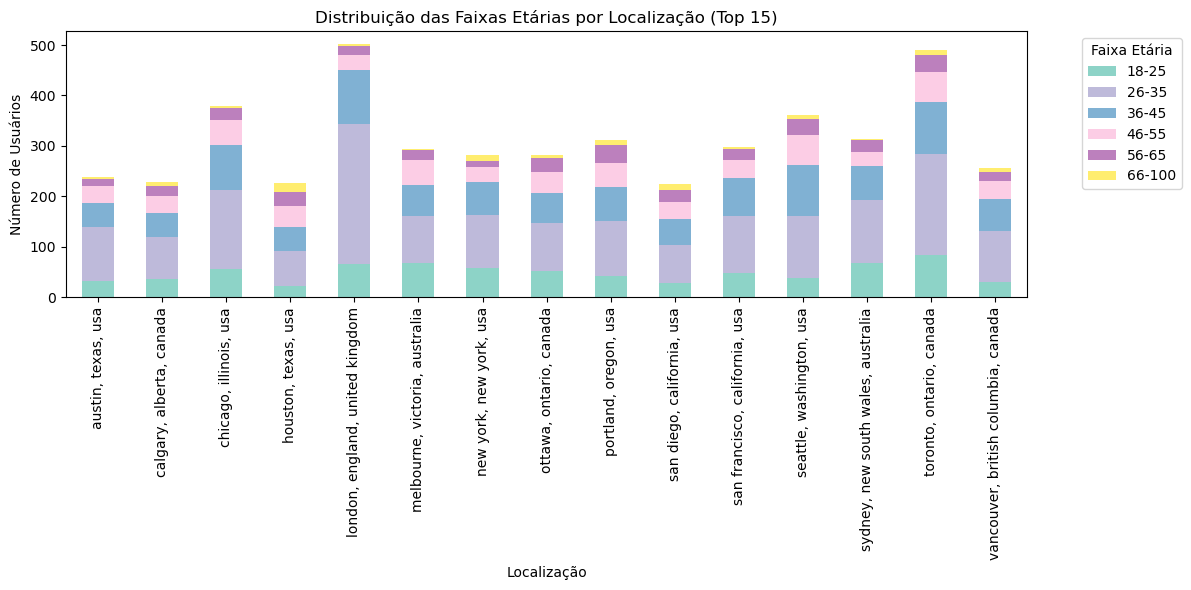

Faixa Etária                         18-25  26-35  36-45  46-55  56-65  66-100
Location                                                                      
austin, texas, usa                      32    107     48     33     15       3
calgary, alberta, canada                37     83     48     32     20       8
chicago, illinois, usa                  57    156     88     50     25       4
houston, texas, usa                     22     69     48     42     27      18
london, england, united kingdom         66    277    108     30     17       4
melbourne, victoria, australia          68     94     60     50     19       3
new york, new york, usa                 58    106     65     29     13      11
ottawa, ontario, canada                 53     95     59     42     28       5
portland, oregon, usa                   42    109     68     48     34      10
san diego, california, usa              28     76     51     33     25      11
san francisco, california, usa          49    113   

In [261]:
print('-----------------------------------------------------------------------------')
print('Existem faixas etárias predominantes em determinadas localizações?')
print('-----------------------------------------------------------------------------')

faixas_etarias = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-100']

df_users_v2['Faixa Etária'] = pd.cut(df_users_v2['Age'], bins=faixas_etarias, labels=labels, right=False)

top_15_localizacoes = df_users_v2['Location'].value_counts().head(15).index

df_top_locations = df_users_v2[df_users_v2['Location'].isin(top_15_localizacoes)]

distribuicao_etaria_localizacao = df_top_locations.groupby(['Location', 'Faixa Etária']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
distribuicao_etaria_localizacao.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Distribuição das Faixas Etárias por Localização (Top 15)')
plt.xlabel('Localização')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=90)
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(distribuicao_etaria_localizacao)

-----------------------------------------------------------------------------
A idade média varia de acordo com a localização dos usuários?
-----------------------------------------------------------------------------


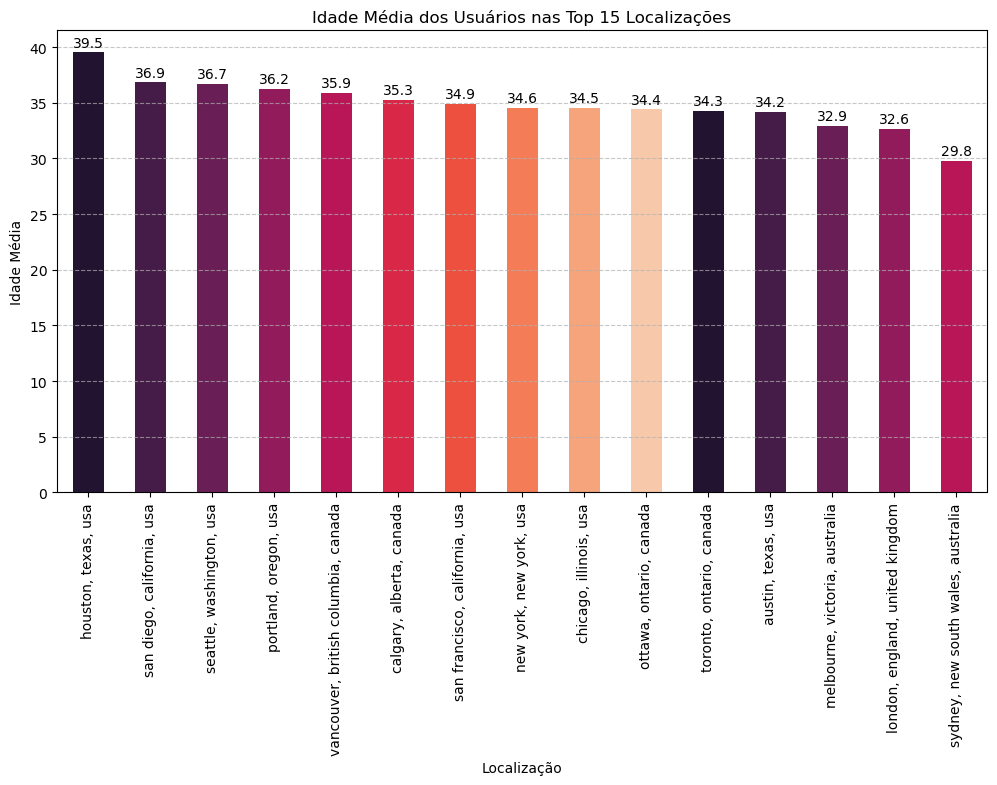

Média de idade nas top 15 localizações: Location
houston, texas, usa                    39.533058
san diego, california, usa             36.861224
seattle, washington, usa                36.69509
portland, oregon, usa                  36.239645
vancouver, british columbia, canada    35.894161
calgary, alberta, canada               35.289157
san francisco, california, usa         34.905537
new york, new york, usa                34.552083
chicago, illinois, usa                 34.529262
ottawa, ontario, canada                34.401274
toronto, ontario, canada               34.272727
austin, texas, usa                     34.188755
melbourne, victoria, australia         32.949254
london, england, united kingdom        32.640535
sydney, new south wales, australia     29.809524
Name: Age, dtype: Float64

Top 5 maiores médias: Location
skeyton, norwich, england, united kingdom         107.0
buch, berlin, germany                             105.0
78126 königsfeld, baden-wuerttemberg, germany 

In [262]:
print('-----------------------------------------------------------------------------')
print('A idade média varia de acordo com a localização dos usuários?')
print('-----------------------------------------------------------------------------')

idade_media_por_localizacao = df_users_v2.groupby('Location')['Age'].mean()

idade_media_top15 = df_top_locations.groupby('Location')['Age'].mean().sort_values(ascending=False)

top_5_maiores = idade_media_por_localizacao.nlargest(5)
top_5_menores = idade_media_por_localizacao.nsmallest(5)


plt.figure(figsize=(12, 6))
idade_media_top15.plot(kind='bar', color=cores)

for i, valor in enumerate(idade_media_top15):
    plt.text(i, valor + 0.5, f"{valor:.1f}", ha='center', fontsize=10)

plt.title('Idade Média dos Usuários nas Top 15 Localizações')
plt.xlabel('Localização')
plt.ylabel('Idade Média')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Média de idade nas top 15 localizações: {idade_media_top15}")
print(f"\nTop 5 maiores médias: {top_5_maiores}")
print(f"\nTop 5 menores médias: \n{top_5_menores}")

-----------------------------------------------------------------------------
Há faixas etárias predominantes entre os usuários?
-----------------------------------------------------------------------------
{'0-18': 5588, '19-25': 11153, '26-35': 18409, '36-45': 12156, '46-55': 8472, '56-65': 4457, '66-75': 1322, '76-85': 218, '86-95': 22, '96-110': 112}


/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/2461187317.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_v2['Faixa_Etaria'] = pd.cut(df_users_v2['Age'], bins=bins, labels=labels, right=True)
/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/2461187317.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuicao_faixas.index, y=distribuicao_faixas.values, palette=cores)


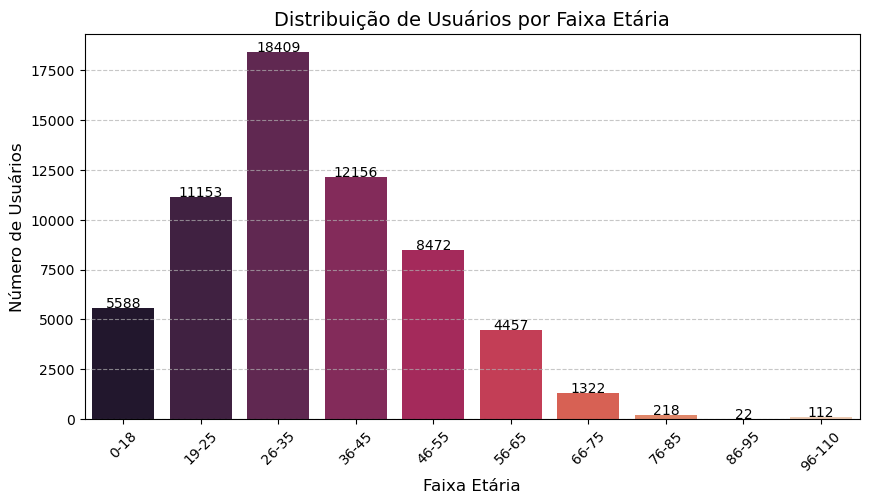

In [263]:
print('-----------------------------------------------------------------------------')
print('Há faixas etárias predominantes entre os usuários?')
print('-----------------------------------------------------------------------------')


bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 95, 110]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96-110']

# Criar uma nova coluna com as faixas etárias
df_users_v2['Faixa_Etaria'] = pd.cut(df_users_v2['Age'], bins=bins, labels=labels, right=True)

# Contar o número de usuários em cada faixa etária
distribuicao_faixas = df_users_v2['Faixa_Etaria'].value_counts().sort_index()

# Exibir a contagem em formato de dicionário
resultado = distribuicao_faixas.to_dict()
print(resultado)

plt.figure(figsize=(10, 5))
sns.barplot(x=distribuicao_faixas.index, y=distribuicao_faixas.values, palette=cores)
plt.title("Distribuição de Usuários por Faixa Etária", fontsize=14)
plt.xlabel("Faixa Etária", fontsize=12)
plt.ylabel("Número de Usuários", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for i, valor in enumerate(distribuicao_faixas):
    plt.text(i, valor + 10, str(valor), ha='center', fontsize=10)

plt.show()

In [264]:
print('-----------------------------------------------------------------------------')
print('Qual é a média, mediana e desvio padrão das idades?')
print('-----------------------------------------------------------------------------')

# Filtrar idades inválidas (NaN, 0 e >110)
df_users = df_users_v2[(df_users_v2['Age'].notna())]

# Calcular estatísticas
media_idade = df_users['Age'].mean()
mediana_idade = df_users['Age'].median()
desvio_padrao_idade = df_users['Age'].std()

# Exibir resultados
print(f"Média das idades: {media_idade:.2f}")
print(f"Mediana das idades: {mediana_idade}")
print(f"Desvio padrão das idades: {desvio_padrao_idade:.2f}")

-----------------------------------------------------------------------------
Qual é a média, mediana e desvio padrão das idades?
-----------------------------------------------------------------------------
Média das idades: 35.46
Mediana das idades: 33.0
Desvio padrão das idades: 14.12


In [265]:
print('-----------------------------------------------------------------------------')
print('Qual é a idade mínima e máxima registrada?')
print('-----------------------------------------------------------------------------')

idade_minima = df_users['Age'].min()
idade_maxima = df_users['Age'].max()

print(f"Idade mínima registrada: {idade_minima}")
print(f"Idade máxima registrada: {idade_maxima}")

-----------------------------------------------------------------------------
Qual é a idade mínima e máxima registrada?
-----------------------------------------------------------------------------
Idade mínima registrada: 1
Idade máxima registrada: 109



##### **Tabela `ratings`**

- Como as avaliações dos livros estão distribuídas (por exemplo, quantas são 1 estrela, 5 estrelas, etc.)?
- Há tendências de avaliações mais altas ou mais baixas para determinados livros, autores ou editoras?
- Quantos usuários avaliaram livros?
- Quantos livros foram avaliados?
- Autores específicas tendem a receber avaliações mais altas ou mais baixas?
- Há diferenças nas avaliações dadas por usuários de diferentes faixas etárias ou localizações?
- Quais são os livros mais populares com base no número de avaliações?
- Usuários de quais localizações ou faixas etárias tendem a avaliar mais livros?

-----------------------------------------------------------------------------
Como as avaliações dos livros estão distribuídas (por exemplo, quantas são 1 estrela, 5 estrelas, etc.)?
-----------------------------------------------------------------------------
Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64


/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/2291555123.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuicao_avaliacoes.index, y=distribuicao_avaliacoes.values, palette="rocket")


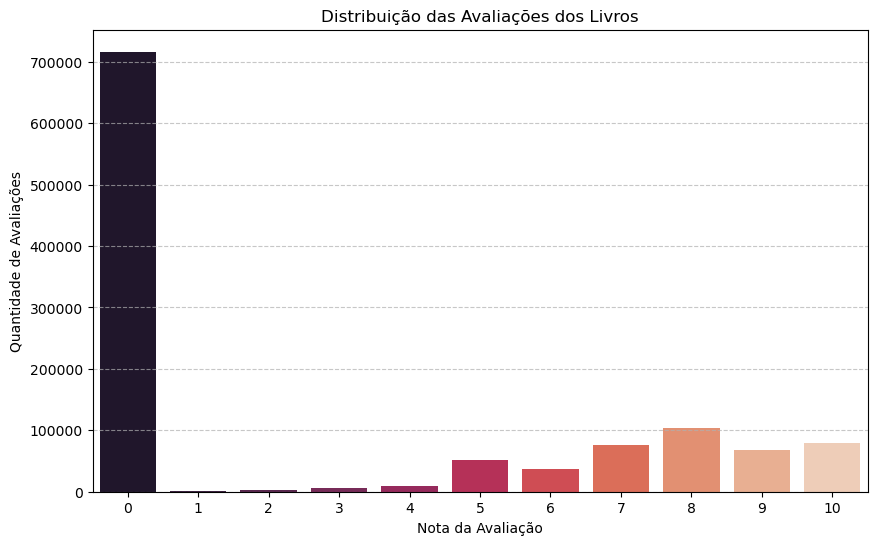

In [266]:
print('-----------------------------------------------------------------------------')
print('Como as avaliações dos livros estão distribuídas (por exemplo, quantas são 1 estrela, 5 estrelas, etc.)?')
print('-----------------------------------------------------------------------------')

distribuicao_avaliacoes = df_ratings_v2['Book-Rating'].value_counts().sort_index()

print(distribuicao_avaliacoes)

plt.figure(figsize=(10, 6))
sns.barplot(x=distribuicao_avaliacoes.index, y=distribuicao_avaliacoes.values, palette="rocket")
plt.xlabel("Nota da Avaliação")
plt.ylabel("Quantidade de Avaliações")
plt.title("Distribuição das Avaliações dos Livros")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)
plt.show()

In [267]:
print('-----------------------------------------------------------------------------')
print('Há tendências de avaliações mais altas ou mais baixas para determinados livros, autores ou editoras?')
print('-----------------------------------------------------------------------------')

# Resetando o índice para que ISBN volte a ser uma coluna
df_books_v2_reset = df_books_v2.reset_index()

df_livros_avaliacoes = df_ratings_v2.merge(df_books_v2_reset[['ISBN', 'Book-Title']], on='ISBN', how='left')

estatisticas_livros = df_livros_avaliacoes.groupby(['ISBN', 'Book-Title'])['Book-Rating'].agg(['mean', 'count'])

estatisticas_livros.columns = ['Média de Avaliação', 'Quantidade de Avaliações']

estatisticas_livros = estatisticas_livros[estatisticas_livros['Quantidade de Avaliações'] >= 5]
estatisticas_livros = estatisticas_livros.sort_values(by='Média de Avaliação', ascending=False)

print("Top 10 livros mais bem avaliados:")
print(estatisticas_livros.head(10))

print("\n10 livros com as piores avaliações:")
print(estatisticas_livros.tail(10))

df_livros_editoras = df_books_v2_reset[['ISBN', 'Publisher']]  # Tabela ISBN x Editoras
df_ratings_editoras = df_ratings_v2.merge(df_livros_editoras, on='ISBN')  # Juntar tabelas


-----------------------------------------------------------------------------
Há tendências de avaliações mais altas ou mais baixas para determinados livros, autores ou editoras?
-----------------------------------------------------------------------------
Top 10 livros mais bem avaliados:
                                                               Média de Avaliação  \
ISBN       Book-Title                                                               
0395193958 The Lord of the Rings (Leatherette Collector's ...           10.000000   
096265342X Principia Discordia                                           9.800000   
1561840564 Prometheus Rising                                             9.666667   
014050639X Each Peach Pear Plum (Picture Puffins)                        9.600000   
0060609176 Meeting Jesus Again for the First Time : The Hi...            9.600000   
0823401898 The Shrinking of Treehorn                                     9.500000   
0385326335 A Letter to Mrs. R

In [268]:
media_editoras = df_ratings_editoras.groupby('Publisher')['Book-Rating'].mean().sort_values(ascending=False)
print(f"Editoras com melhores avaliações: {media_editoras.head(10)}")
print(f"\nEditoras com piores avaliações: {media_editoras.tail(10)}") 

Editoras com melhores avaliações: Publisher
 Editions P. Terrail                    10.0
Conde Nast Books                        10.0
Newfane Press                           10.0
Clarke (Nigel J) Publications           10.0
Clara Pub                               10.0
Clara Fyer Books                        10.0
Clairview Books                         10.0
Nichiren Shoshu International Center    10.0
Shaw &amp; Sons                         10.0
Circustuff                              10.0
Name: Book-Rating, dtype: float64

Editoras com piores avaliações: Publisher
Lawrence Erlbaum Associates             0.0
Law School Admission Council.           0.0
Laurier Books Ltd.                      0.0
Laurel Pr                               0.0
Laureate Press                          0.0
Laura Geringer Book                     0.0
Laughing Tree Press                     0.0
Latin American Literary Review Press    0.0
Late Night Press                        0.0
Ã?Â¶bv&amp;hpt                   

In [269]:
print('-----------------------------------------------------------------------------')
print('Quantos usuários avaliaram livros?')
print('-----------------------------------------------------------------------------')

usuarios_unicos = df_ratings_v2['User-ID'].nunique()
print(f"Total de usuários que avaliaram livros: {usuarios_unicos}")

-----------------------------------------------------------------------------
Quantos usuários avaliaram livros?
-----------------------------------------------------------------------------
Total de usuários que avaliaram livros: 105283


In [270]:
print('-----------------------------------------------------------------------------')
print('Quantos livros foram avaliados?')
print('-----------------------------------------------------------------------------')

livros_avaliados = df_ratings_v2['ISBN'].nunique()
print(f"Total de livros avaliados: {livros_avaliados}")

isbn_nao_encontrados = df_ratings_v2[~df_ratings_v2['ISBN'].isin(df_books_v2_reset['ISBN'])]['ISBN'].unique()
print(f"Número de ISBNs que estão na tabela de avaliações, mas não na tabela de livros: {len(isbn_nao_encontrados)}")


-----------------------------------------------------------------------------
Quantos livros foram avaliados?
-----------------------------------------------------------------------------
Total de livros avaliados: 340556
Número de ISBNs que estão na tabela de avaliações, mas não na tabela de livros: 70405


In [271]:
print('-----------------------------------------------------------------------------')
print('Autores específicos tendem a receber avaliações mais altas ou mais baixas?')
print('-----------------------------------------------------------------------------')

df_autores_avaliacoes = df_ratings_v2.merge(df_books_v2_reset[['ISBN', 'Book-Author']], on='ISBN', how='left')

media_avaliacoes_autores = df_autores_avaliacoes.groupby('Book-Author')['Book-Rating'].agg(['mean', 'count'])

media_avaliacoes_autores = media_avaliacoes_autores.sort_values(by='mean', ascending=False)

print("Top 10 autores com maior média de avaliações:")
print(media_avaliacoes_autores.head(10))

print("\nTop 10 autores com menor média de avaliações:")
print(media_avaliacoes_autores.tail(10))


-----------------------------------------------------------------------------
Autores específicos tendem a receber avaliações mais altas ou mais baixas?
-----------------------------------------------------------------------------
Top 10 autores com maior média de avaliações:
                           mean  count
Book-Author                           
Harold Tietjens            10.0      1
George Wolfe               10.0      1
Sharmat                    10.0      1
Beppe Fenoslio             10.0      1
Michael Muevihill          10.0      1
Michael Mulvihill          10.0      1
Benvenuti                  10.0      1
Bentley Dawn               10.0      1
Bent Formby                10.0      1
Kristine O'Connell George  10.0      1

Top 10 autores com menor média de avaliações:
                      mean  count
Book-Author                      
John Carvel            0.0      1
John Carver            0.0      1
John Cavanagh          0.0      5
John Chancellor        0.0      3
John

In [272]:
media_avaliacoes_autores_filtro = media_avaliacoes_autores[media_avaliacoes_autores['count'] > 5]

media_avaliacoes_autores_filtro = media_avaliacoes_autores_filtro.sort_values(by='mean', ascending=False)

print("Top 10 autores com mais de 5 avaliações e maior média de avaliações:")
print(media_avaliacoes_autores_filtro.head(10))

print("\nTop 10 autores com mais de 5 avaliações e menor média de avaliações:\n")
print(media_avaliacoes_autores_filtro.tail(10))

Top 10 autores com mais de 5 avaliações e maior média de avaliações:
                                      mean  count
Book-Author                                      
Federal Aviation Administration  10.000000      6
David R. Hawkins                 10.000000      7
Dick Dudley                      10.000000      6
Laura Numeroff Joffe             10.000000      6
Michiro Ueyama                   10.000000     13
Pete Abrams                       9.888889      9
Steve Goodier                     9.833333      6
Simon Furman                      9.777778      9
Mitsumasa Anno                    9.636364     11
C. COCO DE YOUNG                  9.500000      8

Top 10 autores com mais de 5 avaliações e menor média de avaliações:

                    mean  count
Book-Author                    
Dev Stryker          0.0      7
Diana Kramer-Rolls   0.0      6
Denise Lynn          0.0      6
Denee Cody           0.0      7
Diana Blayne         0.0      9
Diane Stortz         0.0      9
Dian

In [273]:
print('-----------------------------------------------------------------------------')
print('Há diferenças nas avaliações dadas por usuários de diferentes faixas etárias ou localizações?')
print('-----------------------------------------------------------------------------')

df_avaliacoes_faixa_etaria = df_ratings_v2.merge(df_users_v2[['User-ID', 'Age']], on='User-ID', how='left')

faixas_etarias = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']

df_avaliacoes_faixa_etaria['Faixa-Etaria'] = pd.cut(df_avaliacoes_faixa_etaria['Age'], bins=faixas_etarias, labels=labels, right=False)

media_avaliacoes_faixa_etaria = df_avaliacoes_faixa_etaria.groupby('Faixa-Etaria')['Book-Rating'].mean()

print("Média das avaliações por faixa etária:")
print(media_avaliacoes_faixa_etaria)

-----------------------------------------------------------------------------
Há diferenças nas avaliações dadas por usuários de diferentes faixas etárias ou localizações?
-----------------------------------------------------------------------------
Média das avaliações por faixa etária:
Faixa-Etaria
0-18      3.688935
19-30     2.953481
31-40     2.628444
41-50     2.758253
51-60     2.876778
61-70     2.351151
71-80     4.489386
81-100    3.136147
Name: Book-Rating, dtype: float64


/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/3646215111.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_avaliacoes_faixa_etaria = df_avaliacoes_faixa_etaria.groupby('Faixa-Etaria')['Book-Rating'].mean()


In [274]:
df_avaliacoes_localizacao = df_ratings_v2.merge(df_users_v2[['User-ID', 'Location']], on='User-ID', how='left')

avaliacoes_por_localizacao = df_avaliacoes_localizacao.groupby('Location')['Book-Rating'].count()

localizacoes_com_mais_5_avaliacoes = avaliacoes_por_localizacao[avaliacoes_por_localizacao > 5].index

df_avaliacoes_localizacao_filtrada = df_avaliacoes_localizacao[df_avaliacoes_localizacao['Location'].isin(localizacoes_com_mais_5_avaliacoes)]

media_avaliacoes_localizacao = df_avaliacoes_localizacao_filtrada.groupby('Location')['Book-Rating'].mean()

print("Média das avaliações por localização (Top 10 com mais de 5 avaliações):")
print(media_avaliacoes_localizacao.sort_values(ascending=False).head(10))

print("\nMédia das avaliações por localização (Bottom 10 com mais de 5 avaliações):")
print(media_avaliacoes_localizacao.sort_values(ascending=True).head(10))


Média das avaliações por localização (Top 10 com mais de 5 avaliações):
Location
schinznach-dorf, aargau, switzerland     10.000000
paia, hawaii, usa                        10.000000
divide, colorado, usa                    10.000000
tröbnitz, thueringen, germany            10.000000
centerville, georgia, usa                 9.894737
mountain city, tennessee, usa             9.833333
bayamon, puerto rico, usa                 9.833333
lahore, punjab,                           9.625000
méxico, d.f., disrito federal, mexico     9.588235
g. oryahovitza, n/a, bulgaria             9.500000
Name: Book-Rating, dtype: float64

Média das avaliações por localização (Bottom 10 com mais de 5 avaliações):
Location
naucalpan, edo. de méxico, mexico        0.0
cape vincent, new york, usa              0.0
south brisbane, queensland, australia    0.0
iron mountain, michigan, usa             0.0
caorso, , italia                         0.0
soest, nrw, germany                      0.0
so. chicago heights,

In [275]:
print('-----------------------------------------------------------------------------')
print('Quais são os livros mais populares com base no número de avaliações?')
print('-----------------------------------------------------------------------------')

avaliacoes_por_livro = df_ratings_v2.groupby('ISBN')['Book-Rating'].count()

livros_mais_populares = avaliacoes_por_livro.sort_values(ascending=False)

top_30_livros_populares = livros_mais_populares.head(30)

livros_com_nomes = df_books_v2_reset[df_books_v2_reset['ISBN'].isin(top_30_livros_populares.index)]

resultados_populares = top_30_livros_populares.loc[livros_com_nomes['ISBN']].to_frame().join(livros_com_nomes.set_index('ISBN')['Book-Title'])

print("Livros mais populares com base no número de avaliações:")
print(resultados_populares)



-----------------------------------------------------------------------------
Quais são os livros mais populares com base no número de avaliações?
-----------------------------------------------------------------------------
Livros mais populares com base no número de avaliações:
            Book-Rating                                         Book-Title
ISBN                                                                      
0971880107         2502                                        Wild Animus
0804106304          519                                  The Joy Luck Club
0671027360          586                                Angels &amp; Demons
0452282152          526                          Girl with a Pearl Earring
044023722X          647                                    A Painted House
0142001740          615                            The Secret Life of Bees
0316666343         1295                          The Lovely Bones: A Novel
044021145X          529                     

In [276]:
print('-----------------------------------------------------------------------------')
print('Usuários de quais localizações ou faixas etárias tendem a avaliar mais livros?')
print('-----------------------------------------------------------------------------')

avaliacoes_por_localizacao = df_ratings_v2.groupby('User-ID').agg({'ISBN': 'count'})
avaliacoes_por_localizacao = avaliacoes_por_localizacao.rename(columns={'ISBN': 'Avaliacoes'})

avaliacoes_localizacao = pd.merge(avaliacoes_por_localizacao, df_users_v2[['User-ID', 'Location']], on='User-ID', how='left')

avaliacoes_por_localizacao = avaliacoes_localizacao.groupby('Location')['Avaliacoes'].sum().sort_values(ascending=False)

print("Localizações que mais avaliam livros:")
print(avaliacoes_por_localizacao.head(15))



-----------------------------------------------------------------------------
Usuários de quais localizações ou faixas etárias tendem a avaliar mais livros?
-----------------------------------------------------------------------------
Localizações que mais avaliam livros:
Location
toronto, ontario, canada           16431
n/a, n/a, n/a                      13623
ottawa, ontario, canada             9075
chicago, illinois, usa              8722
seattle, washington, usa            8541
olympia, washington, usa            8033
london, england, united kingdom     7979
omaha, nebraska, usa                7856
little canada, minnesota, usa       7552
st. louis, missouri, usa            7366
duluth, minnesota, usa              6453
san diego, california, usa          6279
portland, oregon, usa               6243
ft. stewart, georgia, usa           6116
calgary, alberta, canada            6013
Name: Avaliacoes, dtype: int64


In [293]:
faixas_etarias = pd.cut(df_users_v2['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

df_users_v2['Faixa Etária'] = faixas_etarias
avaliacoes_por_faixa_etaria = pd.merge(df_ratings_v2, df_users_v2[['User-ID', 'Faixa Etária']], on='User-ID', how='left')

avaliacoes_por_faixa_etaria = avaliacoes_por_faixa_etaria.groupby('Faixa Etária')['ISBN'].count().sort_values(ascending=False)

print("Faixas etárias que mais avaliam livros:")
print(avaliacoes_por_faixa_etaria)

Faixas etárias que mais avaliam livros:
Faixa Etária
31-40     260297
19-30     251664
41-50     159448
51-60      95402
0-18       34601
61-70      30003
71-80       3104
91-100       742
81-90        656
Name: ISBN, dtype: int64


/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/195963679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_v2['Faixa Etária'] = faixas_etarias
/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_30562/195963679.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avaliacoes_por_faixa_etaria = avaliacoes_por_faixa_etaria.groupby('Faixa Etária')['ISBN'].count().sort_values(ascending=False)
